# M4 T01
## Exercici 1
Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

* Una variable categòrica (Districte o Barri)
* Una variable numèrica (Preu)
* Una variable numèrica i una categòrica (Districte i Preu)
* Dues variables numèriques (Any o Trimestre i Preu)
* Tres variables (Barri o Districte, Trimestre i Preu)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/jordi/Documents/IT Academy/Data Science/Sprint 4/preu lloguer per trimestre i barri.csv')
df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


Trobem un dataframe amb 584 files i 8 columnes comptant l'índex, les quals comprenen l'any, trimestre, codi del districte, nom del districte, codi del barri, nom del barri, lloguer mitjà i preu. A "Preu" haurem de discriminar entre preu mitjà mensual i per superfície.

In [2]:
df.isna().sum() #Comprovem si falten dades per netejar el dataset.

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


Aquí comprovem que tenim com a object i no com a float la columna "Preu", el qual ens fa sospitar que tinguem possibles NaNs encoberts.
A continuació ho comprovem:

In [4]:
df['Preu'][:50]

0      759.2
1      929.6
2      808.9
3      879.4
4      918.0
5      887.1
6     1176.7
7     1040.2
8      964.0
9      898.7
10     781.6
11        --
12     810.6
13     799.5
14     778.4
15     807.6
16     788.1
17     829.1
18     990.3
19     927.3
20    1598.2
21    1531.7
22    1263.9
23    1578.0
24    1264.8
25    1294.9
26     990.1
27     959.0
28     745.4
29     859.1
30     910.6
31     865.3
32     817.3
33     741.1
34     791.7
35     795.0
36     668.8
37     716.1
38     700.5
39     741.4
40     827.0
41        --
42     747.4
43     736.5
44     707.2
45     687.2
46        --
47     691.6
48     762.5
49     643.6
Name: Preu, dtype: object

Efectivament comprovem que tenim registres faltants, omplerts amb un "--". Hem de netejar el dataset per poder continuar:

In [5]:
df['Preu'].value_counts()['--'] #Comptem el total de nulls que tenim.

44

In [6]:
df['Preu']=df['Preu'].replace('--',np.nan) #Canviem els "--" per NaN.

In [7]:
#Valorem si les dades faltants ens deixen un percentatge significatiu que afecti la mostra:
total_NaNs= 44/584*100

if total_NaNs <= 10 :
    print(total_NaNs, '% No significatiu')
else:
    print(total_NaNs, '% Significatiu')

7.534246575342466 % No significatiu


In [8]:
df['Preu'] = df['Preu'].astype(float) #Convertim d'object a float la variable i columna "Preu".
df.info() #Comprovem que ho hem fet correctament.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


In [9]:
df['Nom_Districte'].value_counts() #Mostrem els districtes i les aportaciones totals.

Nou Barris             104
Horta-Guinardó          88
Sant Martí              80
Sants-Montjuïc          64
Sant Andreu             56
Eixample                48
Sarrià-Sant Gervasi     48
Gràcia                  40
Ciutat Vella            32
Les Corts               24
Name: Nom_Districte, dtype: int64

In [10]:
barris = df['Nom_Barri'].value_counts()
#Amb el mètode value counts hem vist que el total eren 73 barris, llavors, els visualitzem per comprovar les aportacions per barri:
pd.options.display.max_rows = 73
barris


el Raval                                        8
la Teixonera                                    8
Torre Baró                                      8
la Trinitat Nova                                8
la Prosperitat                                  8
Verdun                                          8
les Roquetes                                    8
Canyelles                                       8
la Guineueta                                    8
Can Peguera                                     8
el Turó de la Peira                             8
Porta                                           8
Vilapicina i la Torre Llobeta                   8
Horta                                           8
la Clota                                        8
la Vall d'Hebron                                8
Montbau                                         8
Ciutat Meridiana                                8
Vallbona                                        8
la Trinitat Vella                               8


Comprovem que cada barri fa 8 aportacions i es per això que districtes amb més barris en presentaven més.

In [11]:
df_mensual = df[df['Lloguer_mitja'].str.contains('Lloguer mitjà mensual')]
df_superficie = df[df['Lloguer_mitja'].str.contains('Lloguer mitjà per superfície')]

In [12]:
df.describe()
#resum estadístic del Dataframe

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,584.0,584.000000,584.000000,584.000000,540.000000
mean,2021.0,2.500000,6.246575,37.000000,442.157222
std,0.0,1.118992,2.790726,21.089371,457.358745
min,2021.0,1.000000,1.000000,1.000000,6.700000
25%,2021.0,1.750000,4.000000,19.000000,12.775000
50%,2021.0,2.500000,7.000000,37.000000,232.750000
75%,2021.0,3.250000,8.000000,55.000000,815.875000
max,2021.0,4.000000,10.000000,73.000000,1816.500000


In [13]:
df_mensual.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,292.0,292.000000,292.000000,292.000000,270.000000
mean,2021.0,2.500000,6.246575,37.000000,871.593704
std,0.0,1.119953,2.793123,21.107481,221.192799
min,2021.0,1.000000,1.000000,1.000000,447.500000
25%,2021.0,1.750000,4.000000,19.000000,742.475000
50%,2021.0,2.500000,7.000000,37.000000,816.350000
75%,2021.0,3.250000,8.000000,55.000000,934.525000
max,2021.0,4.000000,10.000000,73.000000,1816.500000


D'aquest resum estadístic podem extreure com a conclusió que dels 292 habitatges analitzats, el preu mitjà de lloguer mensual a la ciutat es de 871,59€, el mínim es de 447,50€, el màxim de 1816,50€ i al menys un 50% dels habitatges es troben per sobre dels 816,35€.

In [14]:
df_superficie.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,292.0,292.000000,292.000000,292.000000,270.000000
mean,2021.0,2.500000,6.246575,37.000000,12.720741
std,0.0,1.119953,2.793123,21.107481,1.701480
min,2021.0,1.000000,1.000000,1.000000,6.700000
25%,2021.0,1.750000,4.000000,19.000000,11.625000
50%,2021.0,2.500000,7.000000,37.000000,12.750000
75%,2021.0,3.250000,8.000000,55.000000,13.600000
max,2021.0,4.000000,10.000000,73.000000,18.000000


D'aquest resum estadístic podem extreure com a conclusió que dels 292 habitatges analitzats, el preu mitjà per superfície per m2 a la ciutat es de 12,72€, el mínim es de 6,70€, el màxim de 18,0€ i al menys un 50% dels habitatges es troben per sobre dels 12,75€/m2.

He separat el resum estadístic del dataframe, ja que "Preu" conté dues opcions possibles de preu: Preu de lloguer mensual, i preu per m2. Llavors si fem servir el mètode .describe() de tot el dataframe, la columna "Preu" ens mostra resultats falsejats, ja que barreja ambdues opcions.

In [15]:
cars_mensual = df_mensual.sort_values(by='Preu', ascending=False, inplace=False)
cars_mensual.head(15)
#Mostrem els 15 habitatges més cars per mes.

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
312,2021,3,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1816.5
166,2021,2,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1680.3
458,2021,4,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1679.3
20,2021,1,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1598.2
461,2021,4,5,Sarrià-Sant Gervasi,24,les Tres Torres,Lloguer mitjà mensual (Euros/mes),1597.4
23,2021,1,5,Sarrià-Sant Gervasi,24,les Tres Torres,Lloguer mitjà mensual (Euros/mes),1578.0
315,2021,3,5,Sarrià-Sant Gervasi,24,les Tres Torres,Lloguer mitjà mensual (Euros/mes),1566.5
21,2021,1,5,Sarrià-Sant Gervasi,22,"Vallvidrera, el Tibidabo i les Planes",Lloguer mitjà mensual (Euros/mes),1531.7
463,2021,4,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,Lloguer mitjà mensual (Euros/mes),1433.7
169,2021,2,5,Sarrià-Sant Gervasi,24,les Tres Torres,Lloguer mitjà mensual (Euros/mes),1429.0


Podem comprovar que els 15 primers pisos més cars pertanyen a barris ubicats a la zona alta de la ciutat, relacionada amb rendes més altes, tret de dues excepcions situats al barri de La Vila Olímpica del Poblenou, ubicat a la zona d'oci i restauració del front marítim, on s'acostumen a establir molts treballadors internacionals amb més poder adquisitiu que volen gaudir del mar a prop de casa.

In [16]:
barats_mensual = df_mensual.sort_values(by='Preu', ascending=True, inplace=False)
barats_mensual.head(15)
#Fem servir un ascending=True i .head() en lloc de ascending=False i el mètode .tail() per visualitzar els més barats a la part superior.

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
203,2021,2,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),447.5
200,2021,2,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),488.1
54,2021,1,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),520.2
492,2021,4,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),546.8
346,2021,3,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),547.7
490,2021,4,8,Nou Barris,53,la Trinitat Nova,Lloguer mitjà mensual (Euros/mes),557.0
348,2021,3,9,Sant Andreu,57,la Trinitat Vella,Lloguer mitjà mensual (Euros/mes),585.0
202,2021,2,9,Sant Andreu,57,la Trinitat Vella,Lloguer mitjà mensual (Euros/mes),592.4
198,2021,2,8,Nou Barris,53,la Trinitat Nova,Lloguer mitjà mensual (Euros/mes),598.6
52,2021,1,8,Nou Barris,53,la Trinitat Nova,Lloguer mitjà mensual (Euros/mes),605.0


Per contra, els 15 habitatges més barats de mitjana mensual corresponen a dos districtes colindants i perifèrics, i de 5 barris dels mateixos, associats a rendes més baixes i una taxa d'atur superior, predominant Nou Barris com a districte.

In [17]:
cars_m2 = df_superficie.sort_values(by='Preu' , ascending=False , inplace=False)
cars_m2.head(15)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
532,2021,4,5,Sarrià-Sant Gervasi,22,"Vallvidrera, el Tibidabo i les Planes",Lloguer mitjà per superfície (Euros/m2 mes),18.0
285,2021,2,10,Sant Martí,67,la Vila Olímpica del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),17.3
139,2021,1,10,Sant Martí,67,la Vila Olímpica del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),17.3
433,2021,3,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),16.9
513,2021,4,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),16.4
534,2021,4,5,Sarrià-Sant Gervasi,24,les Tres Torres,Lloguer mitjà per superfície (Euros/m2 mes),16.4
367,2021,3,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),16.3
431,2021,3,10,Sant Martí,67,la Vila Olímpica del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),16.2
577,2021,4,10,Sant Martí,67,la Vila Olímpica del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),16.1
387,2021,3,5,Sarrià-Sant Gervasi,23,Sarrià,Lloguer mitjà per superfície (Euros/m2 mes),16.1


El mateix patró trobem si comprovem el lloguer mitjà per superfície, euros/m2 que a l'anàlisi fet anteriorment per la mitjana mensual de preus mes alts, incloent ara també barris com Diagonal Mar o la Barceloneta, situats aprops del mar i relativament del pol tecnològic del 22@, on trobem una gran concentració de talent internacional i local, generalment treballant a empreses tecnològiques amb sous més potents, el qual fa pujar els preus de la zona.

In [18]:
barats_m2 = df_superficie.sort_values(by='Preu' , ascending=True , inplace=False)
barats_m2.head(15)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
276,2021,2,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),6.7
273,2021,2,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),8.1
267,2021,2,8,Nou Barris,49,Canyelles,Lloguer mitjà per superfície (Euros/m2 mes),8.7
127,2021,1,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),9.0
568,2021,4,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),9.2
565,2021,4,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),9.2
121,2021,1,8,Nou Barris,49,Canyelles,Lloguer mitjà per superfície (Euros/m2 mes),9.3
559,2021,4,8,Nou Barris,49,Canyelles,Lloguer mitjà per superfície (Euros/m2 mes),9.3
419,2021,3,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),9.3
558,2021,4,8,Nou Barris,48,la Guineueta,Lloguer mitjà per superfície (Euros/m2 mes),9.4


També repetim patró amb els preus més baixos per m2, amb l'excepció que ara ens apareix també un habitatge del districte d'Horta-Guinardó.

In [19]:
df_grouped = df.groupby(['Nom_Districte','Lloguer_mitja'])['Preu'].agg(['mean','std'])
df_grouped

mean  \
Nom_Districte       Lloguer_mitja                                              
Ciutat Vella        Lloguer mitjà mensual (Euros/mes)             858.925000   
                    Lloguer mitjà per superfície (Euros/m2 mes)    13.775000   
Eixample            Lloguer mitjà mensual (Euros/mes)            1000.545833   
                    Lloguer mitjà per superfície (Euros/m2 mes)    13.300000   
Gràcia              Lloguer mitjà mensual (Euros/mes)             877.265000   
                    Lloguer mitjà per superfície (Euros/m2 mes)    13.380000   
Horta-Guinardó      Lloguer mitjà mensual (Euros/mes)             765.007500   
                    Lloguer mitjà per superfície (Euros/m2 mes)    11.987500   
Les Corts           Lloguer mitjà mensual (Euros/mes)            1214.066667   
                    Lloguer mitjà per superfície (Euros/m2 mes)    14.008333   
Nou Barris          Lloguer mitjà mensual (Euros/mes)             664.292500   
                    Lloguer mitjà per superfície (Euros/m2 mes)    10.922500   
Sant Andreu         Lloguer mitjà mensual (Euros/mes)             721.196154   
                    Lloguer mitjà per superfície (Euros/m2 mes)    11.153846   
Sant Martí          Lloguer mitjà mensual (Euros/mes)             916.450000   
                    Lloguer mitjà per superfície (Euros/m2 mes)    13.440000   
Sants-Montjuïc      Lloguer mitjà mensual (Euros/mes)             798.932143   
                    Lloguer mitjà per superfície (Euros/m2 mes)    12.678571   
Sarrià-Sant Gervasi Lloguer mitjà mensual (Euros/mes)            1271.212500   
                    Lloguer mitjà per superfície (Euros/m2 mes)    15.012500   

                                                                        std  
Nom_Districte       Lloguer_mitja                                            
Ciutat Vella        Lloguer mitjà mensual (Euros/mes)             70.783468  
                    Lloguer mitjà per superfície (Euros/m2 mes)    1.417274  
Eixample            Lloguer mitjà mensual (Euros/mes)            105.239524  
                    Lloguer mitjà per superfície (Euros/m2 mes)    0.353861  
Gràcia              Lloguer mitjà mensual (Euros/mes)             65.810072  
                    Lloguer mitjà per superfície (Euros/m2 mes)    0.661418  
Horta-Guinardó      Lloguer mitjà mensual (Euros/mes)             61.542836  
                    Lloguer mitjà per superfície (Euros/m2 mes)    0.810567  
Les Corts           Lloguer mitjà mensual (Euros/mes)            359.670946  
                    Lloguer mitjà per superfície (Euros/m2 mes)    0.994949  
Nou Barris          Lloguer mitjà mensual (Euros/mes)             71.115199  
                    Lloguer mitjà per superfície (Euros/m2 mes)    1.160788  
Sant Andreu         Lloguer mitjà mensual (Euros/mes)             94.357187  
                    Lloguer mitjà per superfície (Euros/m2 mes)    1.215971  
Sant Martí          Lloguer mitjà mensual (Euros/mes)            178.808413  
                    Lloguer mitjà per superfície (Euros/m2 mes)    1.855664  
Sants-Montjuïc      Lloguer mitjà mensual (Euros/mes)             38.952935  
                    Lloguer mitjà per superfície (Euros/m2 mes)    0.950383  
Sarrià-Sant Gervasi Lloguer mitjà mensual (Euros/mes)            190.916844  
                    Lloguer mitjà per superfície (Euros/m2 mes)    1.265362

He trobat interessant poder tenir de manera agrupada la mitjana de preu mensual i per superfície de cada districte, mostrant la desviació estàndard al seu costat. Podem apreciar que hi ha barris on la desviació estàndard es més elevada, el que ens indica una major varietat de preus entre habitatges.

# Visualitzacions d'una variable categórica:

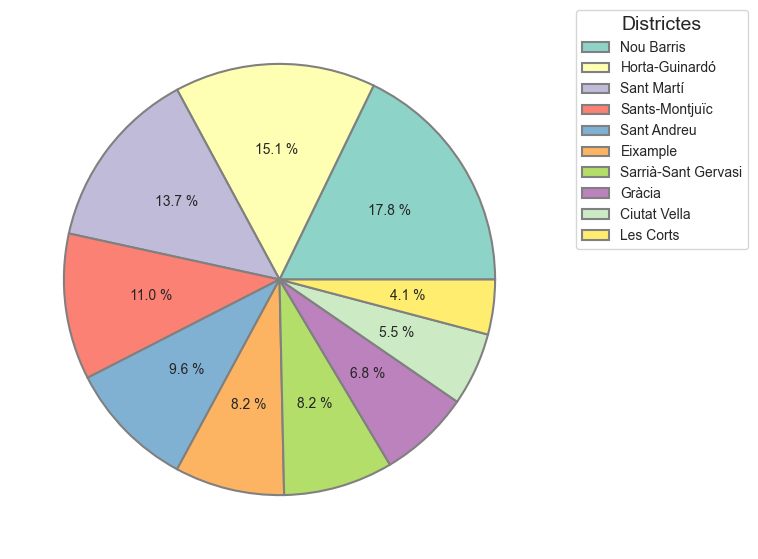

In [20]:
#Visualització variable categòrica:
districtes = df['Nom_Districte'].value_counts() #comptabilitzo i grafico
sns.set_style("white")
plt.figure(figsize=(7,7)) 
plt.pie(districtes, autopct='%0.1f %%', wedgeprops={'linewidth': 1.5, 'edgecolor':'grey'})
plt.legend(labels = districtes.index, bbox_to_anchor=(1.05, 1),  loc= 2, borderaxespad=0.,title='Districtes', fontsize='10', title_fontsize='14')

plt.savefig("pie1var_dist.png", facecolor='white', transparent=False)
plt.show()

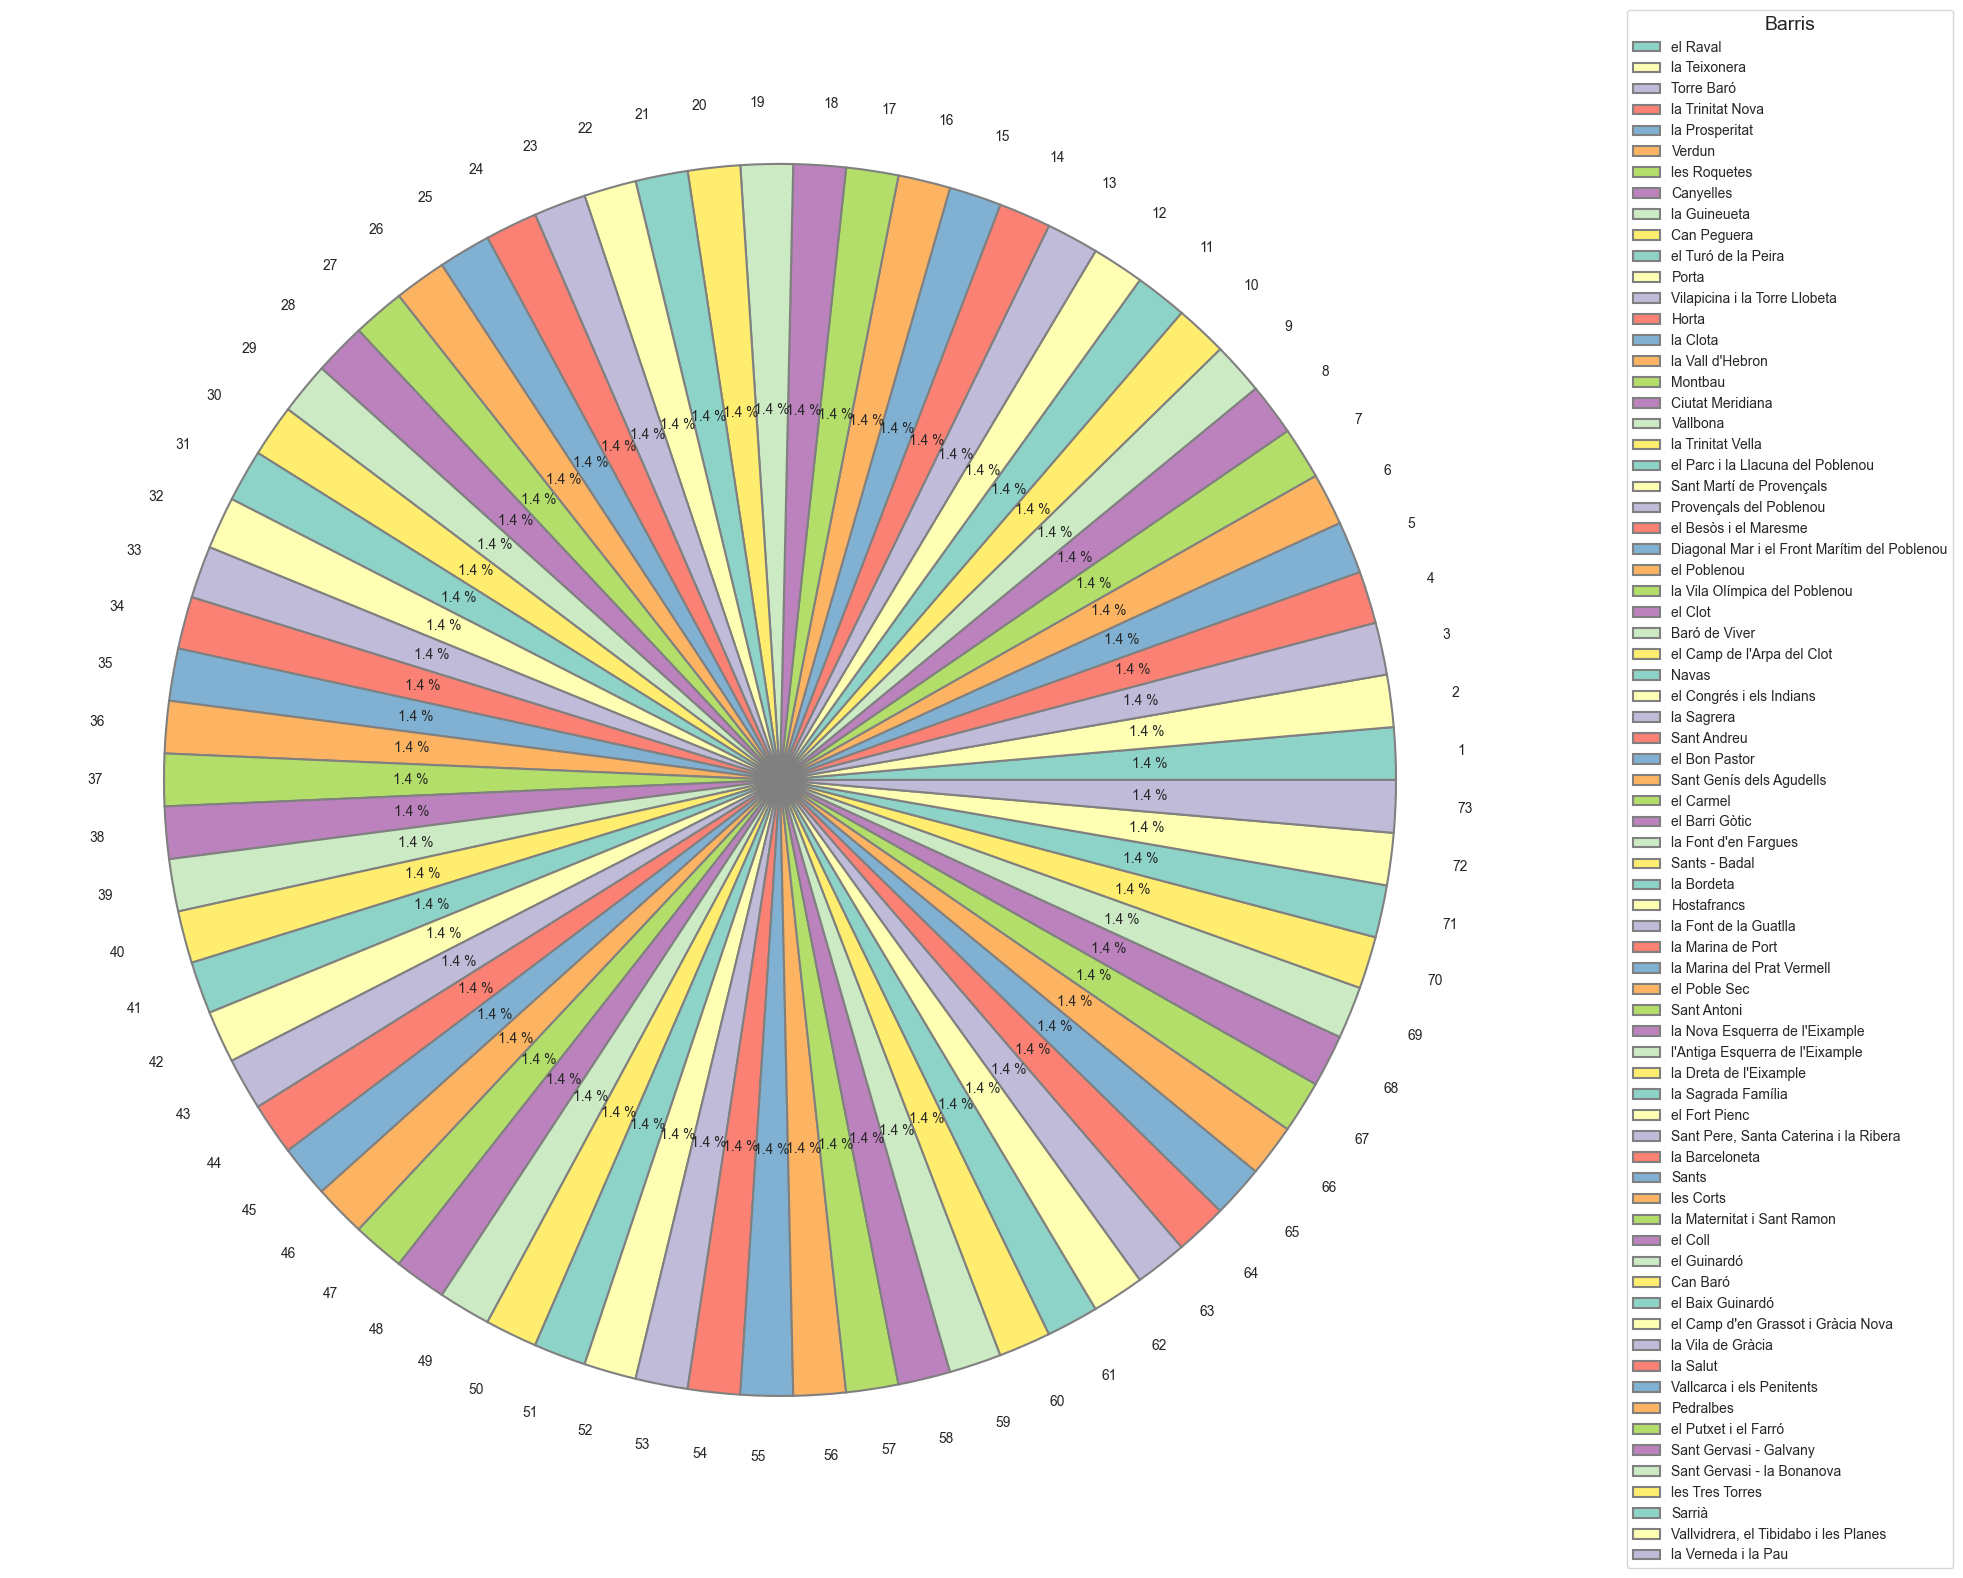

In [21]:
#Visualització variable categòrica 2
barris = df['Nom_Barri'].value_counts() #comptabilitzo i grafico
sns.set_style("white")
plt.figure(figsize=(20,20)) 
plt.pie(barris, labels=range(1, len(barris)+1), autopct='%0.1f %%', wedgeprops={'linewidth': 1.5, 'edgecolor':'grey'})
plt.legend(labels = barris.index, bbox_to_anchor=(1.05, 1),  loc= 2, borderaxespad=0.,title='Barris', fontsize='10', title_fontsize='14')

plt.savefig("pie1var.png", facecolor='white')
plt.show()


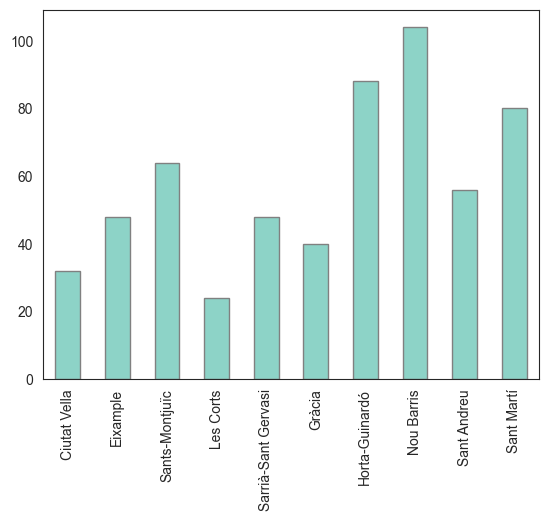

In [22]:
#Gràfica d'una única variable categòrica amb Matplotlib
df.Nom_Districte.value_counts()[df.Nom_Districte.unique()].plot(kind='bar', edgecolor='grey')
#Fem servir el mètode "unique.()" per respectar l'ordre amb el que apareix al dataframe.
plt.savefig("barplt1var.png", facecolor='white')
plt.show()

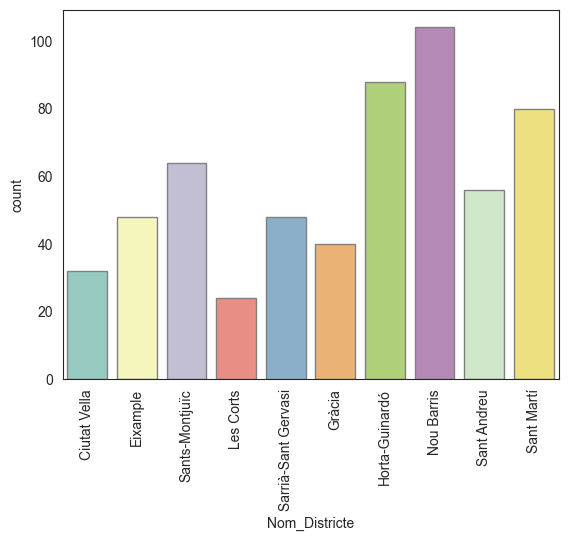

In [23]:
#Gràfica d'una única variable categòrica amb Seaborn.
sns.countplot(data=df, x="Nom_Districte", edgecolor='grey')
#A Seaborn l'ordre es respecta per defecte.
plt.xticks(rotation=90)
#Rotem els noms dels districtes per fer-ho llegible.
plt.savefig("bar1var.png", facecolor='white')
plt.show()

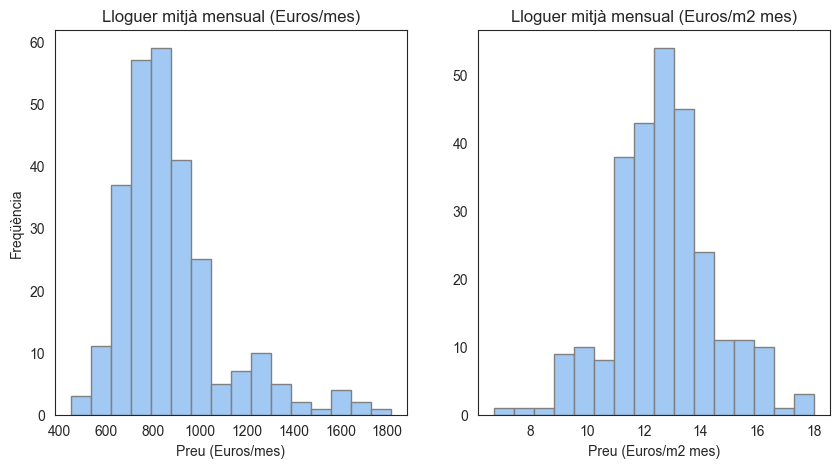

In [24]:
# Filtrem la columna "Lloguer_mitja separant-la en les dues variables que conté"
sns.set_palette('pastel')
df_mensual = df[df['Lloguer_mitja'].str.contains('Lloguer mitjà mensual')]
df_superficie = df[df['Lloguer_mitja'].str.contains('Lloguer mitjà per superfície')]

# Creem dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Creem un histograma al primer subplot
ax1.hist(df_mensual['Preu'], bins=16, edgecolor='grey')
ax1.set_xlabel('Preu (Euros/mes)')
ax1.set_ylabel('Freqüència')
ax1.set_title('Lloguer mitjà mensual (Euros/mes)')

# Creem un histograma al segon subplot
ax2.hist(df_superficie['Preu'], bins=16, edgecolor='grey')
ax2.set_xlabel('Preu (Euros/m2 mes)')
ax2.set_title('Lloguer mitjà mensual (Euros/m2 mes)')
ax2

plt.savefig("hist2var.png", facecolor='white')
plt.show()

In [25]:
print("Rang de preu de lloguer mensual:", "de", df_mensual["Preu"].min(), "a", df_mensual["Preu"].max())
print("Rang de preu per m2:", "de", df_superficie["Preu"].min(), "a", df_superficie["Preu"].max())


Rang de preu de lloguer mensual: de 447.5 a 1816.5
Rang de preu per m2: de 6.7 a 18.0


In [26]:
rang_mensual = df_mensual['Preu'].max() - df_mensual['Preu'].min()
rang_superficie = df_superficie['Preu'].max() - df_superficie['Preu'].min()
print ("El rang del preu mitjà mensual és de " + str(rang_mensual), "€.")
print ("El rang del preu mitjà de superfície per m2 és de " + str(rang_superficie), "€.")

El rang del preu mitjà mensual és de 1369.0 €.
El rang del preu mitjà de superfície per m2 és de 11.3 €.


* Les gràfiques superiors són una representació gràfica de la variable numèrica "Preu".

* Com que la columna "Lloguer_mitja" conté dues variables, el que he fet ha sigut representar gràficament les dues opcions possibles, evitant així que surtin dades errònies. M'he decidit per un histograma per facilitar la visualització de la variable numèrica, així com he fixat en 16 les bins basant-me com a indicador a l'arrel quadrada de la mostra a representar. En ambdós casos n=270, per tant de "16.431676725154983" he arrodonit a 16.

* De les dades analitzades, tot i trobar un rang ampli de 1369€ al preu mitjà mensual i de 11.3€ al preu per m2, veiem un concentració més aviat gaussiana que dispersa al preu mitjà mensual, concentrada als primers dos quartils, degut als alts preus dels barris amb rendes més altes, quedant aquests més aïllats als dos últims quartils. Al gràfic del preu per m2 trobem que aquesta concentració gaussiana es més una tendència central.

### Visualització per una variable numèrica i una categòrica (Districte i Preu):

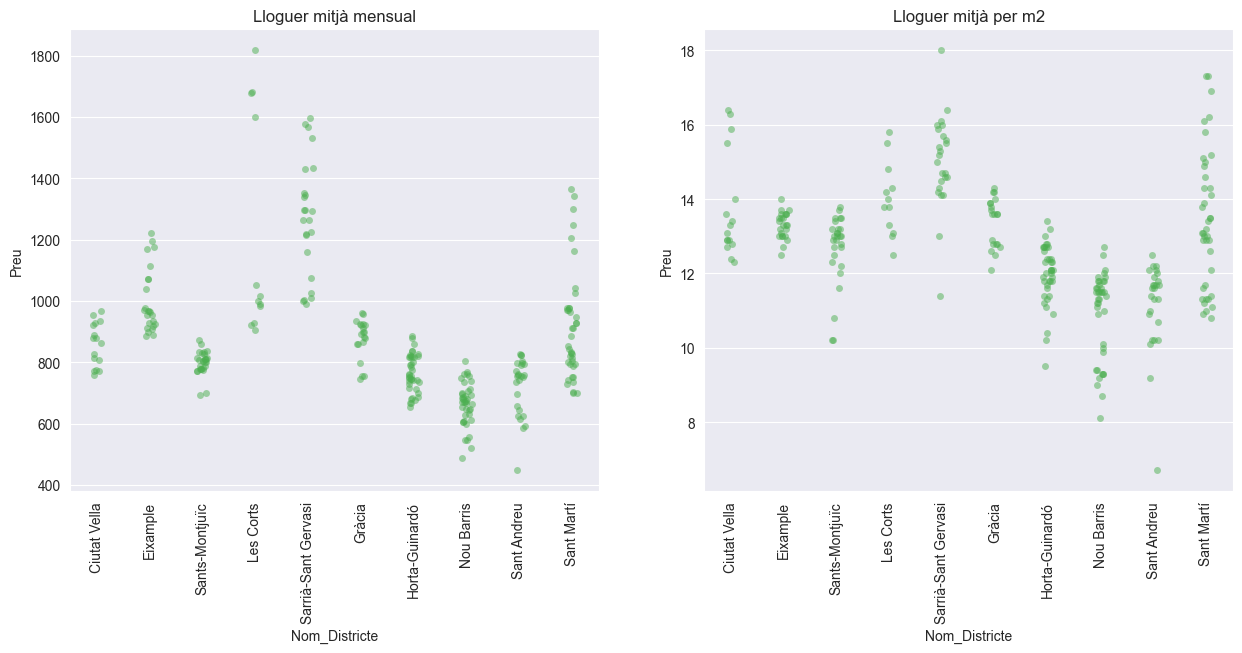

In [27]:
sns.set_style("darkgrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
sns.stripplot(x="Nom_Districte", y="Preu", data=df_mensual, ax=ax1, jitter=True, size=5, alpha=0.5, color="#4CAF50")
ax1.set_title("Lloguer mitjà mensual")
ax1.set_xticklabels(df_mensual["Nom_Districte"].unique(), rotation=90)


sns.stripplot(x="Nom_Districte", y="Preu", data=df_superficie, ax=ax2, jitter=True, size=5, alpha=0.5, color="#4CAF50")
ax2.set_title("Lloguer mitjà per m2")
ax2.set_xticklabels(df_superficie["Nom_Districte"].unique(), rotation=90)

plt.savefig("stripplot2var.png", facecolor='white')
plt.show()

He fet servir un gràfic de dispersió com l'stripplot, per poder veure fàcilment per on es mouen els preus per districte, tant mitjana mensual com per m2. 

A més a més, ens permet identificar fàcilment els outliers, com per exemple al preu mitjà mensual, a Les Corts podem trobar una gran diferència entre els que correspondrien al Barri de Pedralbes (preus més alts) i als que pertanyen a la resta del districte.

Seguint la representació anterior, hem afegit a "Preu", la variable categòrica "Nom_Districte" als gràfics representats a la cel·la superior.
Podem observar dades significatives en quant als preus mitjans mensuals i per m2 als 10 districtes, relacionant on hi ha rendes més altes amb els preus més cars, cèntric o turístic, o serveis com universitats. Per una altra banda, els districtes. Trobem l'excepció a Sant Martí, districte on hi ha més desigualtat entre rendes i barris, degut al front marítim, 22@  i les altes rendes majoritàriament d'estrangers amb alt càrrecs i volen viure a prop del mar que emmascaren les més baixes al calcular la mitjana.

### Visualització de dues variables numèriques (Trimestre i Preu):

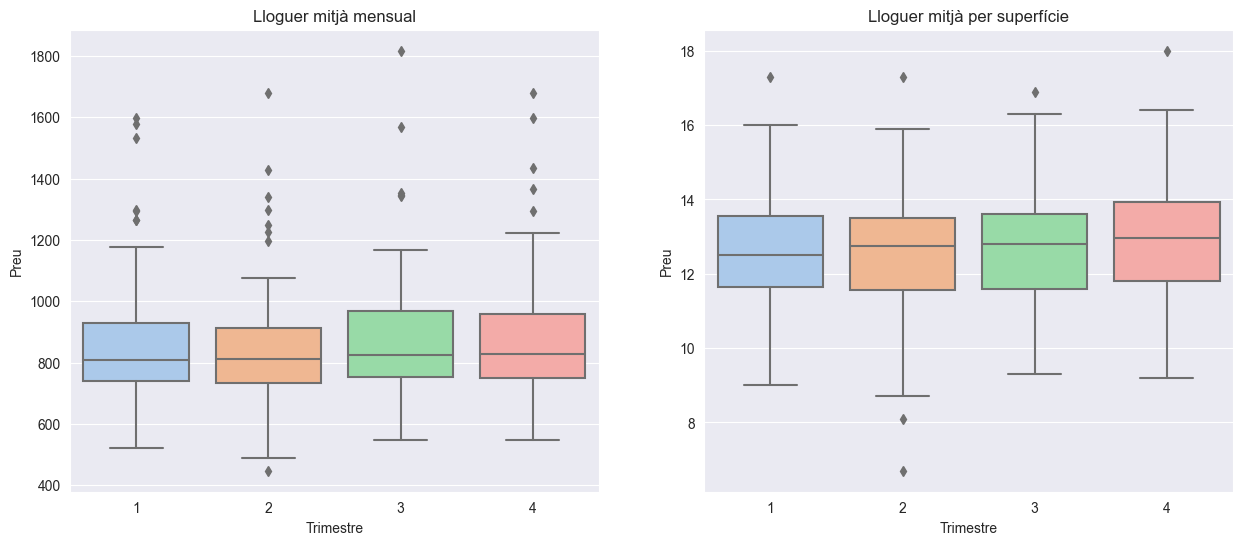

In [28]:
df_mensual = df[df['Lloguer_mitja'].str.contains('Lloguer mitjà mensual')]
df_superficie = df[df['Lloguer_mitja'].str.contains('Lloguer mitjà per superfície')]

sns.set_style("darkgrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
sns.boxplot(x="Trimestre", y="Preu", data=df_mensual, ax=ax1)
ax1.set_title("Lloguer mitjà mensual")

sns.boxplot(x="Trimestre", y="Preu", data=df_superficie, ax=ax2)
ax2.set_title("Lloguer mitjà per superfície")

plt.savefig("boxplot2var.png", facecolor='white')
plt.show()


En aquest cas he optat per un boxplot per poder comprovar des d'on comencen els preus fins on acaben, pero podent concentrar el gruix del preu mig a la caixa, així com poder identificar els outliers fora del bigoti de la mateixa. El boxplot ens útil en aquest cas perque de forma molt visual ens mostra la mediana, els quartils i els valors atípics (outliers).

### Visualització de tres variables (Districte, Trimestre i Preu):

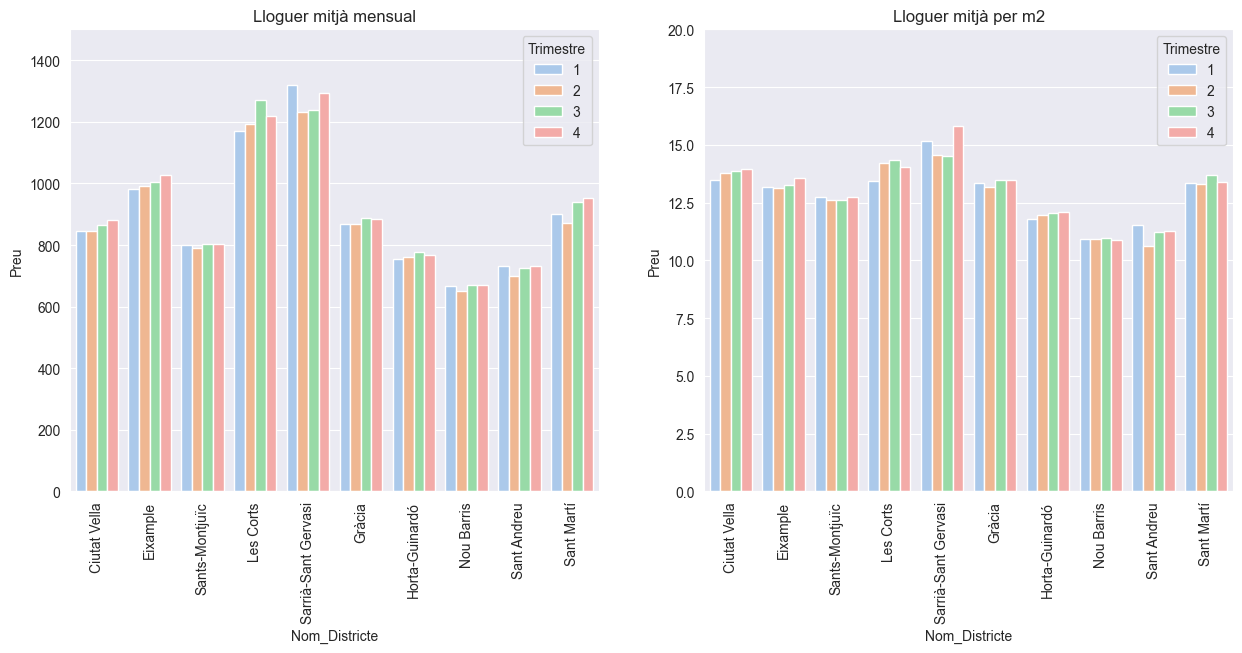

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

sns.barplot(x="Nom_Districte", y="Preu", hue="Trimestre", data=df_mensual, ci=None, ax=ax1)
ax1.set_title("Lloguer mitjà mensual")
ax1.set_xticklabels(df_mensual["Nom_Districte"].unique(), rotation=90)
ax1.set_ylim([0, 1500])

sns.barplot(x="Nom_Districte", y="Preu", hue="Trimestre", data=df_superficie, ci=None, ax=ax2)
ax2.set_title("Lloguer mitjà per m2")
ax2.set_xticklabels(df_superficie["Nom_Districte"].unique(), rotation=90)
ax2.set_ylim([0, 20])

plt.savefig("barplot3var.png", facecolor='white')
plt.show()


Per fer una visualització de tres variables, en aquest cas una categòrica (Nom_Districte), i dues de numèriques (Preu i Trimestre), he optat per unes barres agrupades, fent senzill de veure el preu per trimestre de cada districte, on comprovem una tendència alcista a partir del tercer trimestre, degut a un augment del turisme a l'estiu i l'últim trimestre (inici de curs universitari). Trobem una excepcionalitat al districte de Sarrià - Sant Gervasi, on no acostuma a haver-hi influència del turisme.

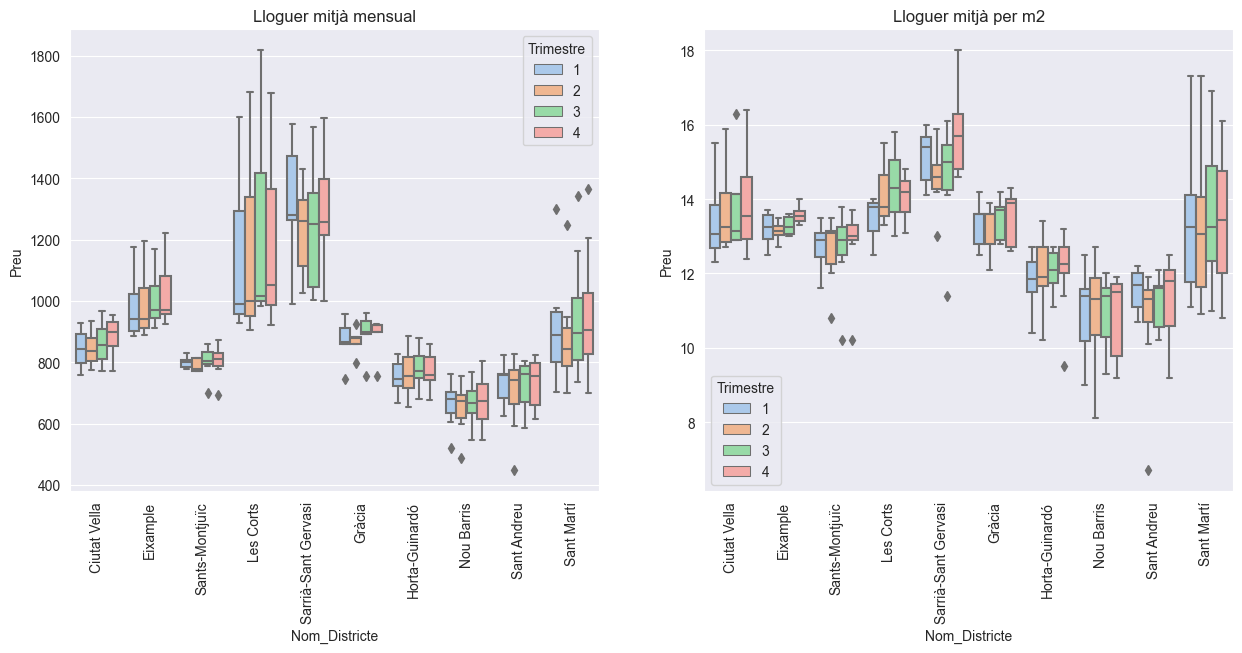

In [30]:
sns.set_style("darkgrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

sns.boxplot(x="Nom_Districte", y="Preu", hue="Trimestre", data=df_mensual, ax=ax1)
ax1.set_title("Lloguer mitjà mensual")
ax1.set_xticklabels(df_mensual["Nom_Districte"].unique(), rotation=90)

sns.boxplot(x="Nom_Districte", y="Preu", hue="Trimestre", data=df_superficie, ax=ax2)
ax2.set_title("Lloguer mitjà per m2")
ax2.set_xticklabels(df_superficie["Nom_Districte"].unique(), rotation=90)

plt.savefig("boxplot3var.png", facecolor='white')
plt.show()



Una alternativa al barplot sería el boxplot, on podriem identificar més fàcilment els outliers.

Aquí he realitzat un gràfic de línea horitzontal, per fer més fácil de visualitzar les tendències del mercat.

# Exercici 2: Exporta els gràfics com imatges o com HTML.
(Fet a cada gràfic amb "plt.savefig("grafic.png")).

# Exercici 3: Proposa alguna visualització que creguis que pot resultar interessant.
Proposo extraure del districte amb preus més cars, una distribució per barris, per veure l'influència de les rendes i habitatges segon barri.

In [31]:
df_districte = df[df['Nom_Districte'] == 'Les Corts'] 
df_preus = df_districte[['Nom_Barri', 'Preu']]
df_preus = df_preus.groupby('Nom_Barri').max() 
df_preus = df_preus.sort_values('Preu', ascending=False)
df_preus

,Preu
Nom_Barri,
Pedralbes,1816.5
les Corts,1052.8
la Maternitat i Sant Ramon,982.9


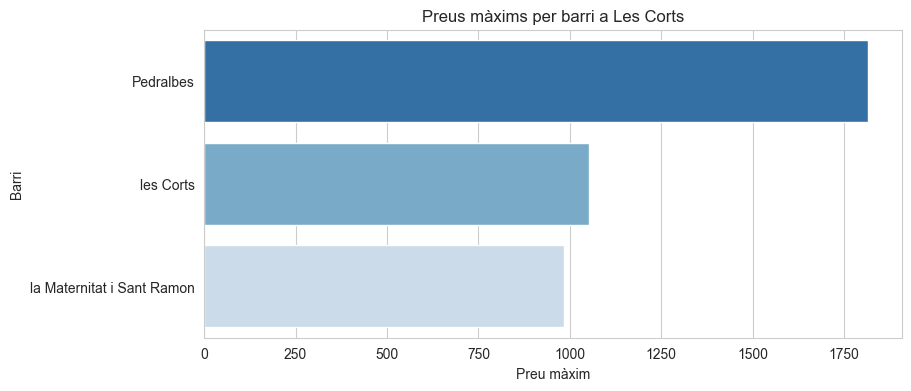

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(9, 4))
sns.barplot(x='Preu', y=df_preus.index, data=df_preus, palette='Blues_r')
plt.xlabel('Preu màxim')
plt.ylabel('Barri')
plt.title('Preus màxims per barri a Les Corts')

plt.savefig('alt_vis.png',facecolor='white')
plt.show()


Llavors, podem comprovar com efectivament, al barri de Pedralbes, on s'acumulen les rendes més altes de la ciutat, hi existeixen uns lloguers més cars per norma. Això no és només degut als salaris més alts, si no també a que degut a això, els habitatges acostumen a ser més grans, hi ha molta més casa que a barris com Les Corts o La Maternitat i Sant Ramon, on predominen els pisos, i una arquitectura molt més vertical.